Python function that takes a date, for example, "2024-02-12", and returns the list of articles for that day (extracting it from the month’s archive).

In [20]:
import requests
import datetime
from datetime import datetime

In [21]:
url = "https://api.nytimes.com/svc/archive/v1/2023/1.json?api-key=Cy6k0XybL4Gwfhr35pdEZrzI86xm6gEQ"

In [22]:
data = requests.get(url)

In [23]:
articles = data.json()

In [24]:
allStories = articles['response']['docs']

In [25]:
def day_articles(day, all_articles):
    articles = []
    # changes date from string to date object
    day = datetime.strptime(day, "%Y-%m-%d")

    for article in all_articles:
        pub_date = datetime.strptime(article['pub_date'][:10], "%Y-%m-%d")
        if pub_date == day:
            articles.append(article)

    return articles

In [26]:
result = day_articles("2023-01-12", allStories)
len(result)

148

Amy Task: 2. Write some code that explores whether the fields "abstract" and "snippet" are always the same or often differ. Which one has more information?


In [27]:
articles = day_articles("2023-01-12", allStories)
articles[0].keys()

dict_keys(['abstract', 'web_url', 'snippet', 'lead_paragraph', 'print_section', 'print_page', 'source', 'multimedia', 'headline', 'keywords', 'pub_date', 'document_type', 'news_desk', 'section_name', 'byline', 'type_of_material', '_id', 'word_count', 'uri'])

In [28]:
# Find any document with difference snippet and abstract
differences = []
for doc in articles:
    #print(doc)
    if doc['snippet'] != "" and doc['abstract'] !="" and doc['abstract']!=doc['snippet']:
        differences.append(doc)
        print("Abstract: "+doc['abstract'])
        print("Snippet: "+doc['snippet'])
print(len(differences))


Abstract: There are now two special counsels looking into presidents — Jack Smith was appointed in November by the attorney general to oversee the two investigations into former President Trump. Here’s more about the powers of a special counsel and why they are used.
Snippet: There are now two special counsels looking into presidents — Jack Smith was appointed in November by the attorney general to oversee the two investigations into former President Trump. Here’s more about the powers of a special counsel and why they...
1


In [29]:
# Note: Some abstract and snippet are 'different' in the way that snippet ends earlier with '...'
# Removes those occurrences from differences
differences = [doc for doc in differences if not (doc['snippet'][-3:]=="..." and doc['abstract'][:len(doc['snippet'])-3]==doc['snippet'][:-3])]
print(len(differences))

0


Rachel Task 3: given one article (in its nested structure), creates a flat dictionary with keys that are relevant for analysis

In [30]:
# Rachel Task 3: given one article (in its nested structure), creates a flat dictionary with keys that are relevant for analysis
def gen_flat_dict(article):
    flat_dict = {}

    flat_dict['abstract'] = article['abstract']
    flat_dict['section_name'] = article['section_name']
    flat_dict['subsection_name'] = article.get('subsection_name', '')
    flat_dict['lead_paragraph'] = article['lead_paragraph']
    flat_dict['headline'] = article['headline']['main']
    # snippet or abstract (snippet in this case)
    flat_dict['snippet'] = article['snippet'] 
    
    # keywords concatenated via semicolon
    keywords = [keyword['value'] for keyword in article['keywords']]
    flat_dict['keywords'] = ';'.join(keywords)

    flat_dict['pub_date'] = article['pub_date']
    flat_dict['document_type'] = article['document_type']
    flat_dict['section_name'] = article['section_name']
    flat_dict['type_of_material'] = article['type_of_material']

    return flat_dict

Rachel Cosine Similarity Begin

In [31]:
myAPIkey = "Cy6k0XybL4Gwfhr35pdEZrzI86xm6gEQ"

In [32]:
import requests, json

def getNYTArticles(year, month, apiKey):
    """Function that sends a request to the NYT API for all articles in a month
    and then stores the results in a JSON file.
    """
    # create URL
    URL = f"https://api.nytimes.com/svc/archive/v1/{year}/{month}.json?api-key={apiKey}"

    # send the request to get the data
    data = requests.get(URL)
    if data.status_code == 200:
        print("Successfully got the data.")

    dataJson = data.json() # get response as JSON

    with open(f"NYT_{year}-{month}.json", 'w') as fout:
        json.dump(dataJson, fout)

In [33]:
getNYTArticles(2024, 2, myAPIkey)

Successfully got the data.


In [34]:
with open("NYT_2024-2.json") as fin:
    articles = json.load(fin)

print(type(articles))

<class 'dict'>


In [35]:
articles.keys()

dict_keys(['copyright', 'response'])

In [36]:
for key in articles:
    print(key, type(articles[key]))

copyright <class 'str'>
response <class 'dict'>


In [37]:
articles['response']['docs'][0]

{'abstract': 'Periods of backlash take shape after surges of Black progress. We have entered another such period.',
 'web_url': 'https://www.nytimes.com/2024/01/31/opinion/racist-backlash-history.html',
 'snippet': 'Periods of backlash take shape after surges of Black progress. We have entered another such period.',
 'lead_paragraph': 'I am fascinated, and alarmed, by the swiftness with which periods of backlash take shape after surges of Black progress, and I believe that we have entered another such period.',
 'print_section': 'A',
 'print_page': '21',
 'source': 'The New York Times',
 'multimedia': [{'rank': 0,
   'subtype': 'xlarge',
   'caption': None,
   'credit': None,
   'type': 'image',
   'url': 'images/2024/02/01/multimedia/31blow1-hvfq/31blow1-hvfq-articleLarge.jpg',
   'height': 800,
   'width': 600,
   'subType': 'xlarge',
   'crop_name': 'articleLarge',
   'legacy': {'xlarge': 'images/2024/02/01/multimedia/31blow1-hvfq/31blow1-hvfq-articleLarge.jpg',
    'xlargewidth': 6

In [38]:
headlines_2402 = [article['headline'] for article in articles['response']['docs']]
headlines_2402

[{'main': 'The Dawn of a New Era of Oppression',
  'kicker': 'Charles M. Blow',
  'content_kicker': None,
  'print_headline': 'The Dawn of a New Era of Oppression',
  'name': None,
  'seo': None,
  'sub': None},
 {'main': 'Man Who Pushed Officer Over Ledge on Jan. 6 Is Sentenced to Six Years',
  'kicker': None,
  'content_kicker': None,
  'print_headline': 'Queens Man Who Tackled Jan. 6 Officer Gets 6 Years',
  'name': None,
  'seo': None,
  'sub': None},
 {'main': 'Running for President Is Not a Hobby',
  'kicker': 'Gail Collins',
  'content_kicker': None,
  'print_headline': 'Running for President Is Not a Hobby',
  'name': None,
  'seo': None,
  'sub': None},
 {'main': 'A federal judge dismisses a suit to block U.S. support of Israel — but urges Biden to re-examine his approach.',
  'kicker': None,
  'content_kicker': None,
  'print_headline': '',
  'name': None,
  'seo': None,
  'sub': None},
 {'main': 'Haley Entered 2024 With $14.6 Million, Fueling Her Enduring Bid',
  'kicker': N

In [39]:
headline_main_2402 = [headline['main'] for headline in headlines_2402]
headline_main_2402

['The Dawn of a New Era of Oppression',
 'Man Who Pushed Officer Over Ledge on Jan. 6 Is Sentenced to Six Years',
 'Running for President Is Not a Hobby',
 'A federal judge dismisses a suit to block U.S. support of Israel — but urges Biden to re-examine his approach.',
 'Haley Entered 2024 With $14.6 Million, Fueling Her Enduring Bid',
 'Peak of Revelation',
 'A Lush, Cheesy Cornbread for All Your Soups and Stews',
 'Israel’s Controlled Demolitions Are Razing Neighborhoods in Gaza',
 'The First Lady and the Dior Pouch: A Political Crisis Grips South Korea',
 'The E.U.’s $54 Billion Deal to Fund Ukraine, Explained',
 'How Much Cash Did Ron DeSantis Burn Through Against Trump?',
 'Thursday Briefing',
 'Biden Is Beating Trump in Money Wars, Though Not Overwhelmingly',
 '3 Dead After Hangar Collapses at Idaho Airport',
 'What to See in N.Y.C. Galleries in February',
 'Word of the Day: unfathomable',
 'Flights Grounded Across Germany as Security Screeners Go on Strike',
 'Today’s Wordle Rev

In [40]:
# NYT API headline main for 202401
getNYTArticles(2024, 1, myAPIkey)
with open("NYT_2024-1.json") as fin:
    articles = json.load(fin)
headlines_2401 = [article['headline'] for article in articles['response']['docs']]
headline_main_2401 = [headline['main'] for headline in headlines_2401]
headline_main_2401

Successfully got the data.


['PGA Tour and Saudi-Backed LIV Extend Deadline to Finalize Deal',
 'Something to Whistle',
 'U.S. Helicopters Sink 3 Houthi Boats in Red Sea, Pentagon Says',
 'In Times Square, Hundreds of Thousands Ring In 2024',
 'Quotation of the Day: In a Jewish-Arab School, an Oasis From Division but Not From Deep Fears',
 'Half of Gazans Are at Risk of Starving, U.N. Warns',
 'How to Start the New Year? Keep the Sea Goddess Happy.',
 'What’s Sapping Your Energy?',
 'Day 1: A 5-Minute Trick for More Energy',
 'Monday Briefing',
 'What’s on TV This Week: ‘RuPaul’s Drag Race’ and the Golden Globes',
 'Today’s Wordle Review',
 'Spelling Bee Forum',
 'The Connections Companion',
 'It’s 2024. Here Are the New Laws That New Yorkers Should Know About.',
 'The Well Team Knows You’re Tired. And They’re Here to Help.',
 'New State Laws on Hot-Button Issues Take Effect Today',
 'Can New Haven’s Legendary Pizza Joints Play on the National Stage?',
 'Chill in the Housing Market Seeps Into Other Industries',
 

In [41]:
# NYT API headline main for 202307
getNYTArticles(2023, 7, myAPIkey)
with open("NYT_2023-7.json") as fin:
    articles = json.load(fin)
headlines_2307 = [article['headline'] for article in articles['response']['docs']]
headline_main_2307 = [headline['main'] for headline in headlines_2307]
headline_main_2307

Successfully got the data.


['Sheriff Recorded Making Inflammatory Comments Won’t Face Charges',
 'Governor Vetoes Louisiana’s Ban on Transition Care for Transgender Minors',
 'Robert Kennedy Jr. Reports Income of $7.8 Million',
 'Coast Guard Apologizes for Covering Up Long History of Sexual Assault',
 'Certain Surprise Party?',
 'On ‘The Bear,’ Interning at a Fine-Dining Restaurant Is Rosier Than Reality',
 'Hollywood Actors Extend Contract Talks at Deadline',
 'Before Wimbledon, There’s Practice on Grass at an English Garden Party',
 'France Is on Fire',
 'Quotation of the Day: In Ruined Town, Resolved to Stay ’Until the End’',
 'Corrections: July 1, 2023',
 'Today’s Wordle Review',
 'Gov. Murphy Looks to Burnish Legacy With a $54.3 Billion Budget',
 'Where to Watch July 4 Fireworks in the New York City Area',
 'Spelling Bee Forum',
 '9 Ways to Stay Shaded on a Sweltering Day in New York City',
 'A Fractured Family Heads North',
 'My Building Manager Wants to Get on My Renter’s Insurance. Is That Legal?',
 'How

In [42]:
# NYT API headline main for 202308
getNYTArticles(2023, 8, myAPIkey)
with open("NYT_2023-8.json") as fin:
    articles = json.load(fin)
headlines_2308 = [article['headline'] for article in articles['response']['docs']]
headline_main_2308 = [headline['main'] for headline in headlines_2308]
headline_main_2308

Successfully got the data.


['Biden Cancels Space Command Move to Alabama Amid Tuberville Feud',
 'Paul Reubens Was More Than Pee-wee. Here are 8 Great Performances.',
 'Crunch Muscles, for Short',
 'After Paying Lawyers, Trump’s PAC Is Nearly Broke',
 'Tuesday Briefing',
 'Move Over, Men: Women Were Hunters, Too',
 'Putin’s Crackdown Leaves Transgender Russians Bracing for Worse',
 'Quotation of the Day: Scientists Revive Two Roundworms That Were Encased in Siberian Permafrost for 46,000 Years',
 'Corrections: Aug. 1, 2023',
 'Topline Results: July 2023 Times/Siena Poll of Registered Voters',
 'Cross-Tabs: July 2023 Times/Siena Poll of the 2024 Race and National Issues',
 'After Investigation and Complaints, Twitter Removes ‘X’ on Headquarters',
 'The Covid Test Company That Got Into the Migrant Business',
 'Tropical Cyclone Kills 2 in Southern Japan',
 'Aung San Suu Kyi’s Prison Sentence Reduced in Myanmar',
 'Today’s Wordle Review',
 'Can the Race Really Be That Close? Yes, Biden and Trump Are Tied.',
 'Suspec

In [43]:
# NYT API headline main for 202309
getNYTArticles(2023, 9, myAPIkey)
with open("NYT_2023-9.json") as fin:
    articles = json.load(fin)
headlines_2309 = [article['headline'] for article in articles['response']['docs']]
headline_main_2309 = [headline['main'] for headline in headlines_2309]
headline_main_2309

Successfully got the data.


['Could Australia and New Zealand Become One Nation?',
 'John Isner Says Goodbye to Pro Tennis at the U.S. Open',
 'Corrections: Sept. 1, 2023',
 'In Visit to Tiny Flock in Mongolia, Pope Has an Eye on Russia and China',
 'Adventures in the Serengeti',
 'Variety: Puns and Anagrams',
 'DeSantis Super PAC’s Urgent Plea to Donors: ‘We Need 50 Million Bucks’',
 'Police Hunt for Convicted Murderer Who Escaped Pennsylvania Prison',
 'How the Dream of Building a California City From Scratch Got Started',
 'Why I Dress (and Act) Like a Man',
 'Quotation of the Day: California Reconsiders Identity as Siren Song Fades',
 'Finding Her ‘Barack Obama’ With the Help of a Friend',
 'Friday Briefing',
 'Finding a Lifetime Karaoke Partner Miles From Home',
 'Making It Official With a Song and a Scroll',
 'In a Crisis (or Two), They Both Knew Where to Turn for Help',
 'A Scandal and Its Fallout Compound the British Museum’s Woes',
 'Sasha Waltz’s Dance Company: 30 Years of Giving Form to Feeling',
 'At 

In [44]:
# NYT API headline main for 202310
getNYTArticles(2023, 10, myAPIkey)
with open("NYT_2023-10.json") as fin:
    articles = json.load(fin)
headlines_2310 = [article['headline'] for article in articles['response']['docs']]
headline_main_2310 = [headline['main'] for headline in headlines_2310]
headline_main_2310

Successfully got the data.


['Senate Democrat Threatens to Block More of Military Aid to Egypt',
 'How Each Member Voted on the Senate Stopgap Spending Measure',
 'What Does a Russia-Leaning Party Win in an E.U. Nation Mean for Ukraine?',
 'Police Chief Who Ordered Raid on Kansas Newspaper Is Suspended',
 'Chris Snow, Hockey Executive Who Publicly Faced A.L.S., Dies at 42',
 'Newsom Vetoes Bill Allowing Workers to Collect Unemployment Pay While Striking',
 'No Corrections: Oct. 1, 2023',
 'Quotation of the Day: Through Triumph and Tragedy, Feinstein Helped Shape San Francisco',
 'Nikki Haley Won the Debate Stage. Now, She’s Trying to Win Over Iowa.',
 'Spelling Bee Forum',
 'A Cooking Editor Who Finds Inspiration Everywhere',
 '‘Before Leaving Town, We Stopped to Get Sandwiches to Eat in the Car’',
 'Maybe in Your Lifetime, People Will Live on the Moon and Then Mars',
 'Today’s Wordle Review',
 'The Gilgo Beach Suspect May Have Hunted Them. Now They’re Key Witnesses.',
 'The Hottest New Accessory in Niger? A Russ

In [45]:
# NYT API headline main for 202311
getNYTArticles(2023, 11, myAPIkey)
with open("NYT_2023-11.json") as fin:
    articles = json.load(fin)
headlines_2311 = [article['headline'] for article in articles['response']['docs']]
headline_main_2311 = [headline['main'] for headline in headlines_2311]
headline_main_2311

Successfully got the data.


['Fruit Flies Are Invading Los Angeles. The Solution? More Fruit Flies.',
 'The fate of many Gazans lies with the Rafah crossing, and Egypt.',
 'For Europe’s Jews, a World of Fear',
 'Woman Is Accused of Fatally Poisoning Boyfriend With Antifreeze for Inheritance',
 'Tyler Christopher, Actor Best Known for ‘General Hospital,’ Dies at 50',
 'Sites of Some Docs',
 'Corrections: Nov. 1, 2023',
 'It’s a Bird. It’s a Dame. It’s Heidi Klum’s Halloween Costume.',
 'They Propelled China’s Rise. Now They Have Nothing to Fall Back On.',
 'How Germany’s Greens Lost Their Luster',
 'Wednesday Briefing',
 'Italy’s Prime Minister Broke Up With Her Boyfriend. It’s Actually Quite a Big Deal.',
 'Tropical Storm Pilar Kills at Least 1 in El Salvador',
 'Word of the Day: stilted',
 'Harris Warns That the ‘Existential Threats’ of A.I. Are Already Here',
 'Charlamagne Tha God Gets Short With Ron DeSantis on ‘The Daily Show’',
 'Spelling Bee Forum',
 'The Connections Companion',
 'Today’s Wordle Review',
 '

In [46]:
# NYT API headline main for 202312
getNYTArticles(2023, 12, myAPIkey)
with open("NYT_2023-12.json") as fin:
    articles = json.load(fin)
headlines_2312 = [article['headline'] for article in articles['response']['docs']]
headline_main_2312 = [headline['main'] for headline in headlines_2312]
headline_main_2312

Successfully got the data.


['Donald Trump Still Wants to Kill Obamacare. Why?',
 '6 Former Jail Officers Charged in Death of West Virginia Inmate',
 'Israel Knew Hamas’s Attack Plan More Than a Year Ago',
 'Judge Halts TikTok Ban in Montana',
 'Kissinger Had the Ear of Presidents. He Had Their Awe and Ire, Too.',
 'Criminal Investigation Roils Florida Republican Party',
 'Biden Hosts Angola’s President, Seeking to Strengthen Africa Ties',
 'Jeff Bezos’ Giant Yacht Is Apparently Too Big to Anchor Near Others in Florida',
 'Alleged Assassination Plot on U.S. Soil Tests Biden’s Bond With India’s Leader',
 'Blinken Urges Israel to Take Concrete Steps to Aid Civilians as More Hostages Are Freed',
 'Return to Haiti of a Coup Leader Raises Concerns of More Turmoil',
 'For Ron DeSantis, a Democratic Sparring Partner at a Tenuous Time in His Campaign',
 '3-Year-Old Boy Killed in Hit and Run in Queens',
 'Review: A Shady Documentary Becomes a Weapon of War in ‘Spain’',
 'Theresa Nist ‘Never Expected to Get to This Part’',

In [47]:
# use the collective main headlines from 2023-07 to 2024-02 
headline_main = headline_main_2307 + headline_main_2308 + headline_main_2309 + headline_main_2310 + headline_main_2311+ headline_main_2312 + headline_main_2401 + headline_main_2402
headline_main

['Sheriff Recorded Making Inflammatory Comments Won’t Face Charges',
 'Governor Vetoes Louisiana’s Ban on Transition Care for Transgender Minors',
 'Robert Kennedy Jr. Reports Income of $7.8 Million',
 'Coast Guard Apologizes for Covering Up Long History of Sexual Assault',
 'Certain Surprise Party?',
 'On ‘The Bear,’ Interning at a Fine-Dining Restaurant Is Rosier Than Reality',
 'Hollywood Actors Extend Contract Talks at Deadline',
 'Before Wimbledon, There’s Practice on Grass at an English Garden Party',
 'France Is on Fire',
 'Quotation of the Day: In Ruined Town, Resolved to Stay ’Until the End’',
 'Corrections: July 1, 2023',
 'Today’s Wordle Review',
 'Gov. Murphy Looks to Burnish Legacy With a $54.3 Billion Budget',
 'Where to Watch July 4 Fireworks in the New York City Area',
 'Spelling Bee Forum',
 '9 Ways to Stay Shaded on a Sweltering Day in New York City',
 'A Fractured Family Heads North',
 'My Building Manager Wants to Get on My Renter’s Insurance. Is That Legal?',
 'How

In [48]:
# function to get vocab from all the main headlines
import string
def getVocabulary(textchunk):
    """Given some text, create the vocabulary of unique words."""
    textchunk = textchunk.lower()
    cleantext = "".join(char for char in textchunk if char not in string.punctuation)
    words = set(cleantext.split())
    voc = sorted(words)

    return voc

In [54]:
# the NYT vocabulary from headline main
nyt_vocab = getVocabulary(" ".join(headline_main))
nyt_vocab = [word.lower() for word in nyt_vocab if word.isalpha()]
nyt_vocab = list(set(nyt_vocab))  # Remove duplicated vocab
nyt_vocab

['brady',
 'polarization',
 'rowdy',
 'closes',
 'commemorates',
 'paid',
 'reich',
 'exports',
 'growth',
 'dollars',
 'admissions',
 'aigenerated',
 'statements',
 'between',
 'pantry',
 'exbuildings',
 'gwsnatoexplainer',
 'disastrous',
 'diet',
 'thrashed',
 'so',
 'alvin',
 'degree',
 'annoyed',
 'ellison',
 'infernos',
 'michael',
 'dukkah',
 'unsettle',
 'gay',
 'benson',
 'debating',
 'ups',
 'clip',
 'fouling',
 'teetering',
 'span',
 'priced',
 'deepwater',
 'strawberries',
 'knife',
 'corinne',
 'quirky',
 'marriage',
 'sleepers',
 'databases',
 'fabrication',
 'saxophone',
 'freedoms',
 'purpose',
 'quo',
 'buirski',
 'verses',
 'astronomers',
 'madagascar',
 'jobless',
 'subzero',
 'dartmouth',
 'salam',
 'tenement',
 'authoritarians',
 'parlor',
 'leader',
 'chauffeurs',
 'knockouts',
 'stagnates',
 'pisa',
 'sputnik',
 'cans',
 'clerks',
 'reservists',
 'paradise',
 'merrygoround',
 'millionaire',
 'emissary',
 'formally',
 'clamps',
 'exploitative',
 'supervise',
 'unpu

In [50]:
def text2vector(sentence, voc):
    """Given a sentence and the vocabulary for the problem,
    turn every sentence into a vector.
    """
    cleantext = "".join(char for char in sentence if char not in string.punctuation)
    words = cleantext.lower().split()
    vector = [words.count(w) for w in voc]
    return vector

In [51]:
def sentence_sugg_words(suggested_words):
    suggested_words.lower()
    word_char = suggested_words.split(',')
    words = [sub_word.strip().lower() for word in word_char for sub_word in word.split()]
    words = [word.strip().lower() for word in words]
    words = list(set(words)) # remove duplicate words
 
    return words

In [146]:
!pip install --upgrade tensorflow
!pip install --upgrade numpy
!pip install tensorflow_hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 2.8 MB/s eta 0:00:0000:0100:01


Start preparing video data

In [13]:
import csv
import pandas as pd
data = pd.read_csv("results_33534.csv")
posts = pd.DataFrame(data)
#removing nan values
posts = posts[posts['suggested_words'].notna()]
#filtering to videos in the US
posts = posts[posts['video_locationcreated'] == 'US']
posts.head()

,video_id,video_timestamp,video_duration,video_locationcreated,suggested_words,video_diggcount,video_sharecount,video_commentcount,video_playcount,video_description,video_is_ad,video_stickers,author_username,author_name,author_followercount,author_followingcount,author_heartcount,author_videocount,author_diggcount,author_verified
9,7310028237902646574,2023-12-07T20:23:09,52.0,US,"leana deeb old videos, Leana Deeb, Leana Deeb ...",236700.0,1884.0,1623.0,1600000.0,🇵🇸❤️,False,NaN,leanadeeb,Leana Deeb,NaN,NaN,NaN,NaN,NaN,False
11,7324777537576488197,2024-01-16T14:17:53,5.0,US,"Katiana Throwing It, face card, because face c...",109200.0,309.0,374.0,2200000.0,NaN,False,NaN,katiana.kay,katiana,NaN,NaN,NaN,NaN,NaN,True
13,7327753328975334702,2024-01-24T14:46:10,61.0,US,"eating pho, bunbaehue, surprising grandparents...",224400.0,861.0,624.0,2000000.0,Yeah she sick of us,False,NaN,bunbaehue,Bunbaehue 🍜,NaN,NaN,NaN,NaN,NaN,False
19,7306252753158950187,2023-11-27T16:12:30,6.0,US,"gail lewis walmart, guy slipping in ice for 15...",2000000.0,108700.0,19800.0,28900000.0,He kept going 😂 (via @Wendy Woods 💕) #snow #cold,False,NaN,espn,ESPN,NaN,NaN,NaN,NaN,NaN,True
20,7324363620521889067,2024-01-15T11:31:52,27.0,US,"acid reflux, what is a wart, body hacks, how t...",559300.0,17600.0,990.0,9900000.0,"🙌 Body Hacks 🧠 For those that get a headache, ...",False,NaN,healthwithcory,Cory Rodriguez,NaN,NaN,NaN,NaN,NaN,False


In [14]:
import re

def clean_sugg_words(sugg_words):
    sugg_words = re.sub(r'\d+', '', sugg_words)
    words = sugg_words.split(',')
    words = [sub_word.strip().lower() for word in words for sub_word in word.split()]
    words = [word.strip().lower() for word in words]
    
    return words


In [16]:
posts['video_keywords'] = posts['suggested_words'].apply(clean_sugg_words)
posts.head()

,video_id,video_timestamp,video_duration,video_locationcreated,suggested_words,video_diggcount,video_sharecount,video_commentcount,video_playcount,video_description,...,video_stickers,author_username,author_name,author_followercount,author_followingcount,author_heartcount,author_videocount,author_diggcount,author_verified,video_keywords
9,7310028237902646574,2023-12-07T20:23:09,52.0,US,"leana deeb old videos, Leana Deeb, Leana Deeb ...",236700.0,1884.0,1623.0,1600000.0,🇵🇸❤️,...,NaN,leanadeeb,Leana Deeb,NaN,NaN,NaN,NaN,NaN,False,"[leana, deeb, old, videos, leana, deeb, leana,..."
11,7324777537576488197,2024-01-16T14:17:53,5.0,US,"Katiana Throwing It, face card, because face c...",109200.0,309.0,374.0,2200000.0,NaN,...,NaN,katiana.kay,katiana,NaN,NaN,NaN,NaN,NaN,True,"[katiana, throwing, it, face, card, because, f..."
13,7327753328975334702,2024-01-24T14:46:10,61.0,US,"eating pho, bunbaehue, surprising grandparents...",224400.0,861.0,624.0,2000000.0,Yeah she sick of us,...,NaN,bunbaehue,Bunbaehue 🍜,NaN,NaN,NaN,NaN,NaN,False,"[eating, pho, bunbaehue, surprising, grandpare..."
19,7306252753158950187,2023-11-27T16:12:30,6.0,US,"gail lewis walmart, guy slipping in ice for 15...",2000000.0,108700.0,19800.0,28900000.0,He kept going 😂 (via @Wendy Woods 💕) #snow #cold,...,NaN,espn,ESPN,NaN,NaN,NaN,NaN,NaN,True,"[gail, lewis, walmart, guy, slipping, in, ice,..."
20,7324363620521889067,2024-01-15T11:31:52,27.0,US,"acid reflux, what is a wart, body hacks, how t...",559300.0,17600.0,990.0,9900000.0,"🙌 Body Hacks 🧠 For those that get a headache, ...",...,NaN,healthwithcory,Cory Rodriguez,NaN,NaN,NaN,NaN,NaN,False,"[acid, reflux, what, is, a, wart, body, hacks,..."


In [17]:
## might not need
def sentence_sugg_words(suggested_words):
    suggested_words = suggested_words.lower() 
    word_char = suggested_words.split(',')
    words = [sub_word.strip().lower() for word in word_char for sub_word in word.split()]
    words = list(set(words))  # Convert to set to remove duplicates, then back to list
 
    return words

In [226]:
# don't run
posts['video_words'] = posts['suggested_words'].apply(sentence_sugg_words)
posts.head()

,video_id,video_timestamp,video_duration,video_locationcreated,suggested_words,video_diggcount,video_sharecount,video_commentcount,video_playcount,video_description,...,author_username,author_name,author_followercount,author_followingcount,author_heartcount,author_videocount,author_diggcount,author_verified,video_keywords,video_words
9,7310028237902646574,2023-12-07T20:23:09,52.0,US,"leana deeb old videos, Leana Deeb, Leana Deeb ...",236700.0,1884.0,1623.0,1600000.0,🇵🇸❤️,...,leanadeeb,Leana Deeb,NaN,NaN,NaN,NaN,NaN,False,"[leana, deeb, old, videos, leana, deeb, leana,...","[oven, leana, boundary, old, work, videos, pal..."
11,7324777537576488197,2024-01-16T14:17:53,5.0,US,"Katiana Throwing It, face card, because face c...",109200.0,309.0,374.0,2200000.0,NaN,...,katiana.kay,katiana,NaN,NaN,NaN,NaN,NaN,True,"[katiana, throwing, it, face, card, because, f...","[my, decline, biggie, don't, face, its, card, ..."
13,7327753328975334702,2024-01-24T14:46:10,61.0,US,"eating pho, bunbaehue, surprising grandparents...",224400.0,861.0,624.0,2000000.0,Yeah she sick of us,...,bunbaehue,Bunbaehue 🍜,NaN,NaN,NaN,NaN,NaN,False,"[eating, pho, bunbaehue, surprising, grandpare...","[eating, sleepover, bunbaehue, grandparents, s..."
19,7306252753158950187,2023-11-27T16:12:30,6.0,US,"gail lewis walmart, guy slipping in ice for 15...",2000000.0,108700.0,19800.0,28900000.0,He kept going 😂 (via @Wendy Woods 💕) #snow #cold,...,espn,ESPN,NaN,NaN,NaN,NaN,NaN,True,"[gail, lewis, walmart, guy, slipping, in, ice,...","[on, slipping, tiktoks, in, skating, espn, guy..."
20,7324363620521889067,2024-01-15T11:31:52,27.0,US,"acid reflux, what is a wart, body hacks, how t...",559300.0,17600.0,990.0,9900000.0,"🙌 Body Hacks 🧠 For those that get a headache, ...",...,healthwithcory,Cory Rodriguez,NaN,NaN,NaN,NaN,NaN,False,"[acid, reflux, what, is, a, wart, body, hacks,...","[a, remove, acid, to, wart, care, what, relief..."


Get word embedding

In [228]:
!install tensorflow
!install tensorflow_hub

usage: install [-bCcpSsv] [-B suffix] [-f flags] [-g group] [-m mode]
               [-o owner] file1 file2
       install [-bCcpSsv] [-B suffix] [-f flags] [-g group] [-m mode]
               [-o owner] file1 ... fileN directory
       install -d [-v] [-g group] [-m mode] [-o owner] directory ...
usage: install [-bCcpSsv] [-B suffix] [-f flags] [-g group] [-m mode]
               [-o owner] file1 file2
       install [-bCcpSsv] [-B suffix] [-f flags] [-g group] [-m mode]
               [-o owner] file1 ... fileN directory
       install -d [-v] [-g group] [-m mode] [-o owner] directory ...


In [230]:
pip install --upgrade numpy

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
import tensorflow_hub as hub

2024-03-15 00:36:06.666481: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/xuruipeng/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# load the Universal Sentence Encoder's TF Hub module
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [6]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.7/130.7 kB 2.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.4/346.4 kB 4.3 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.8/150.8 MB 830.8 kB/s eta 0:00:000:01m00:05
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 1.8 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 2.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.9/170.9 kB 2.2 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.4/426.4 kB 5.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 4.6 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: fsspec
    Found existing installati

In [7]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('distilbert-base-nli-mean-tokens')

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.02k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/550 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/265M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/450 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [8]:
from numpy.linalg import norm

def cosineSimilarity(vec1, vec2):
    V1 = np.array(vec1)
    V2 = np.array(vec2)
    cosine = np.dot(V1, V2)/(norm(V1)*norm(V2))
    return cosine

In [19]:
posts['video_sentences'] = posts.apply(lambda row: " ".join(row['video_keywords']), axis=1)
posts.head()

,video_id,video_timestamp,video_duration,video_locationcreated,suggested_words,video_diggcount,video_sharecount,video_commentcount,video_playcount,video_description,...,author_username,author_name,author_followercount,author_followingcount,author_heartcount,author_videocount,author_diggcount,author_verified,video_keywords,video_sentences
9,7310028237902646574,2023-12-07T20:23:09,52.0,US,"leana deeb old videos, Leana Deeb, Leana Deeb ...",236700.0,1884.0,1623.0,1600000.0,🇵🇸❤️,...,leanadeeb,Leana Deeb,NaN,NaN,NaN,NaN,NaN,False,"[leana, deeb, old, videos, leana, deeb, leana,...",leana deeb old videos leana deeb leana deeb wi...
11,7324777537576488197,2024-01-16T14:17:53,5.0,US,"Katiana Throwing It, face card, because face c...",109200.0,309.0,374.0,2200000.0,NaN,...,katiana.kay,katiana,NaN,NaN,NaN,NaN,NaN,True,"[katiana, throwing, it, face, card, because, f...",katiana throwing it face card because face car...
13,7327753328975334702,2024-01-24T14:46:10,61.0,US,"eating pho, bunbaehue, surprising grandparents...",224400.0,861.0,624.0,2000000.0,Yeah she sick of us,...,bunbaehue,Bunbaehue 🍜,NaN,NaN,NaN,NaN,NaN,False,"[eating, pho, bunbaehue, surprising, grandpare...",eating pho bunbaehue surprising grandparents w...
19,7306252753158950187,2023-11-27T16:12:30,6.0,US,"gail lewis walmart, guy slipping in ice for 15...",2000000.0,108700.0,19800.0,28900000.0,He kept going 😂 (via @Wendy Woods 💕) #snow #cold,...,espn,ESPN,NaN,NaN,NaN,NaN,NaN,True,"[gail, lewis, walmart, guy, slipping, in, ice,...",gail lewis walmart guy slipping in ice for sec...
20,7324363620521889067,2024-01-15T11:31:52,27.0,US,"acid reflux, what is a wart, body hacks, how t...",559300.0,17600.0,990.0,9900000.0,"🙌 Body Hacks 🧠 For those that get a headache, ...",...,healthwithcory,Cory Rodriguez,NaN,NaN,NaN,NaN,NaN,False,"[acid, reflux, what, is, a, wart, body, hacks,...",acid reflux what is a wart body hacks how to r...


In [59]:
def text2vector(sentence, voc):
    """Given a sentence and the vocabulary for the problem,
    turn every sentence into a vector.
    """
    cleantext = "".join(char for char in sentence if char not in string.punctuation)
    words = cleantext.lower().split()
    vector = [words.count(w) for w in voc]
    return vector

In [55]:
# nyt sentence the same across all videos
nyt_sentence = " ".join(nyt_vocab)
nyt_sentence

'brady polarization rowdy closes commemorates paid reich exports growth dollars admissions aigenerated statements between pantry exbuildings gwsnatoexplainer disastrous diet thrashed so alvin degree annoyed ellison infernos michael dukkah unsettle gay benson debating ups clip fouling teetering span priced deepwater strawberries knife corinne quirky marriage sleepers databases fabrication saxophone freedoms purpose quo buirski verses astronomers madagascar jobless subzero dartmouth salam tenement authoritarians parlor leader chauffeurs knockouts stagnates pisa sputnik cans clerks reservists paradise merrygoround millionaire emissary formally clamps exploitative supervise unpublished dig krayzie minimalist supported significant fuss elwes nate ding overdue game carson dad devlin zucker foreshadowed offer kat remain downfall accidentally pumped guardianships rebuilt retaliates focused substations vivid nesters drapery acrostic presentday flashback was margaret hitmen derek swifts year dai

In [77]:
##  calculate cosine similarities with sbert 
import numpy as np
cosine_similarities = {}

for index, row in posts.iterrows():
    video_id = row['video_id']
    video_sentence = row['video_sentences']
    
    video_embedding = sbert_model.encode([video_sentence])[0]
    nyt_embedding = sbert_model.encode(nyt_sentence)
    
    cosine_sim = cosineSimilarity(video_embedding, nyt_embedding)

    cosine_similarities[video_id] = cosine_sim

cosine_similarities

{7310028237902646574: 0.51147443,
 7324777537576488197: 0.60683036,
 7327753328975334702: 0.6086092,
 7306252753158950187: 0.54642165,
 7324363620521889067: 0.50876194,
 7316982795283287339: 0.4609924,
 7327757398427438378: 0.5995201,
 7336131007956978990: 0.46738818,
 7335336532879985963: 0.61900485,
 7335594018669153582: 0.5549383,
 7338631887189003566: 0.56759655,
 7336247060968099118: 0.12099942,
 7338168660323749163: 0.48148832,
 7319652492575280415: 0.70535177,
 7336491937421380910: 0.4203481,
 7273551672897457451: 0.6243897,
 7337766759182732587: -0.07318269,
 7339321061885988138: 0.5686638,
 7339462567049350446: 0.43697727,
 7339637964529519914: 0.20735316,
 7336569076682214699: 0.5367191,
 7336233096834043142: 0.3741042,
 7326726328168860970: 0.5006562,
 7339725080055827755: 0.39741862,
 7339562593264078110: 0.5729095,
 7339266660416769323: 0.62006825,
 7333067271885032736: 0.36722147,
 7338837606840651054: 0.6521343,
 7340382949755424043: 0.09625049,
 7336710186133916974: 0.5

Rachel: cosine similarity visualization

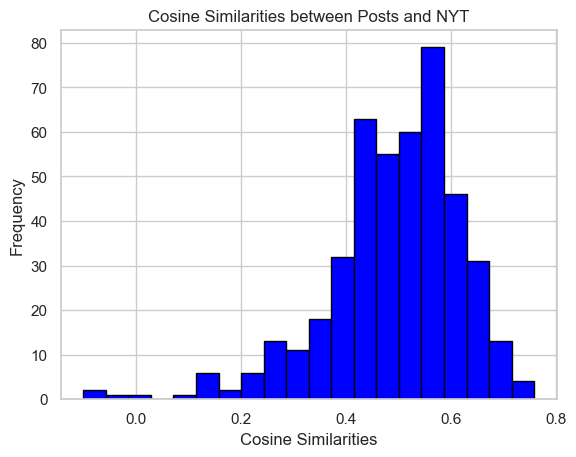

In [82]:
# cosine similarity visualization
import matplotlib.pyplot as plt

cos_sim = list(cosine_similarities.values())

# create histogram
plt.hist(cos_sim, bins=20, color='blue', edgecolor='black')
plt.title('Cosine Similarities between Posts and NYT')
plt.xlabel('Cosine Similarities')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

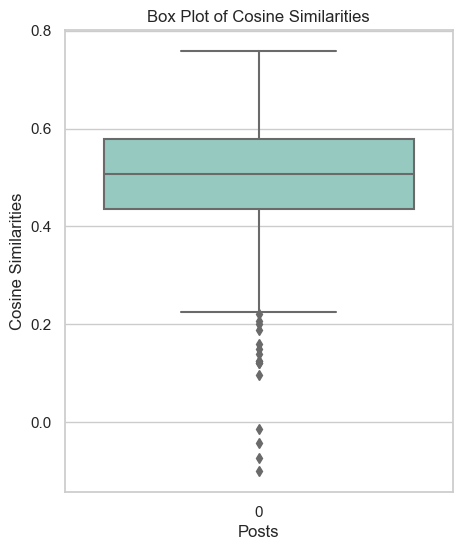

In [83]:
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(5, 6))
sns.boxplot(data=cos_sim, palette="Set3")
plt.title('Box Plot of Cosine Similarities')
plt.ylabel('Cosine Similarities')
plt.xlabel('Posts')
plt.show()

Rachel: cosine similarity further exploration

In [86]:
# explore top 10 posts with highest cosine similarities
sorted_cosine_similarity = sorted(cosine_similarities.items(), key=lambda x: x[1], reverse=True)
top_10_cos_sim = sorted_cosine_similarity[:10]
top_10_cos_sim

[(7335525352862649646, 0.7583043),
 (7339734703554989358, 0.7248795),
 (7337424955694451998, 0.7213548),
 (7340115904279121195, 0.7179057),
 (7334495099080019242, 0.7149168),
 (7319652492575280415, 0.70535177),
 (7338913318825970990, 0.70287037),
 (7338099702933802286, 0.6992675),
 (7322907597957319982, 0.69596314),
 (7340064735251090734, 0.6945953)]